In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn import metrics

In [1]:
import os
for dirname, _, filenames in os.walk('/Users/student/Desktop/2020023_Final'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/student/Desktop/2020023_Final/.DS_Store
/Users/student/Desktop/2020023_Final/chatgpt1.csv
/Users/student/Desktop/2020023_Final/Untitled.ipynb
/Users/student/Desktop/2020023_Final/2020023_final.ipynb
/Users/student/Desktop/2020023_Final/2020023.ipynb
/Users/student/Desktop/2020023_Final/.ipynb_checkpoints/2020023-checkpoint.ipynb
/Users/student/Desktop/2020023_Final/.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [2]:
df = pd.read_csv('/Users/student/Desktop/2020023_Final/chatgpt1.csv')

In [3]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [4]:
df.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
49996,2023-01-24 06:57:56+00:00,1617778712082096128,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481992705,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678044162,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678044162,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0
50000,2023-01-24 06:58:01+00:00,1617778733355790342,Ahora sueño con el día en que Amazon integre u...,AmericoSD_69,https://twitter.com/AmericoSD_69/status/161777...,https://twitter.com/AmericoSD_69,NaN,NaN,0,0,0,0,1617778733355790342,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0


In [5]:
df.shape

(50001, 20)

In [73]:
df = df[['Text','Language']]
df = df.dropna()
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]','')

/var/folders/rh/brhc68qd6tz5qmd49qw1g03w0000gn/T/ipykernel_3455/388637711.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


In [83]:
X = df['Text']  # Feature set
y = df['Language']  # Target variable

In [74]:
df.columns

Index(['Text', 'Language'], dtype='object')

In [75]:
df.duplicated().sum()

554

In [76]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [79]:
df.nunique()

Text        49444
Language       61
dtype: int64

In [80]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [81]:
most_frequent_values(df)

,Text,Language
Total,50001,50001
Most frequent item,chatgpt_issac ai,en
Frequence,178,32076
Percent from total,0.356,64.151


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df['Language'].unique()

array(['ja', 'en', 'de', 'tr', 'pl', 'fr', 'es', 'pt', 'lo', 'no', 'ca',
       'zh', 'qme', 'th', 'ne', 'ko', 'und', 'nl', 'fa', 'it', 'da', 'fi',
       'eu', 'hi', 'ar', 'sv', 'in', 'ru', 'qht', 'tl', 'hu', 'cs', 'uk',
       'iw', 'et', 'cy', 'bg', 'ht', 'el', 'vi', 'sl', 'kn', 'ro', 'lt',
       'ur', 'zxx', 'ml', 'mr', 'lv', 'gu', 'qam', 'is', 'ta', 'te', 'pa',
       'sd', 'am', 'sr', 'hy', 'or', 'bn'], dtype=object)

In [86]:
df['Language'].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

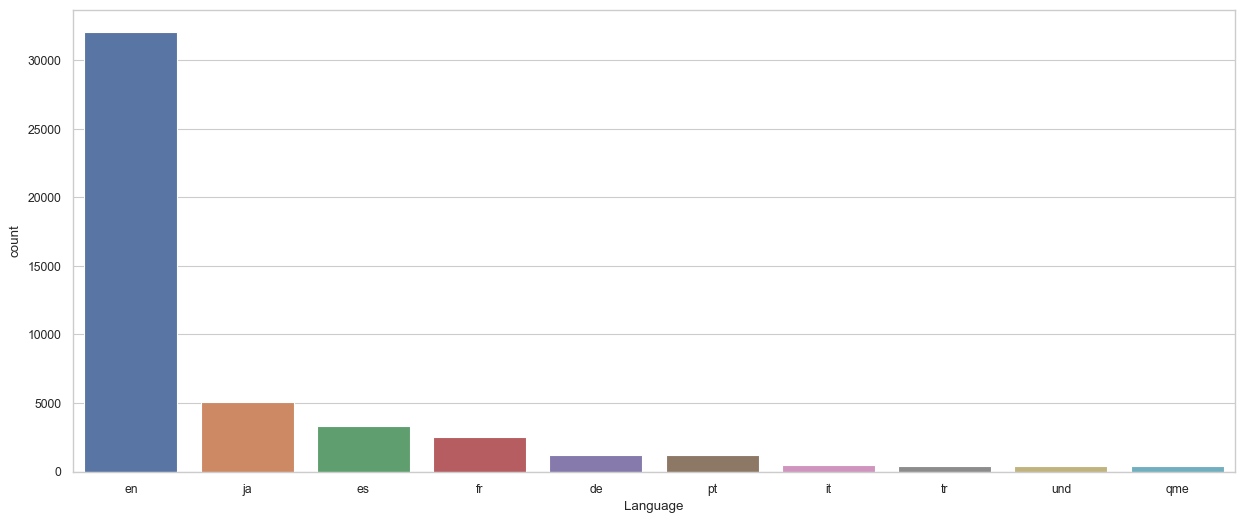

In [87]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [88]:
df['Text'].unique()

array(['chatgptで遊ぶの忘れてた\n書類作るコード書いてみてほしいのと\nどこまで思考整理付き合ってくれるのかと\nウミガメのスープやってみたい\nあとは調べ物してくれ\n事務所でちょいといじったがとりあえず色々やってみたい',
       'alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughters school',
       'schaut euch an was fobizz dianaknodel alles  auf die piste bringt um euch mitzunehmen \n\nmorgen startet reg_schulz  und am di um 12 besprechen wir chatgpt als kritische freundinnen im livebriefing mit spdvorsitzender eskensaskia amp diana\nhttpstcodsoevjrpbp httpstcohfltruresk httpstco7tycx6srp8',
       ...,
       '5 minuti di chatgpt e ho capito che apprende in maniera superficiale da fonti non qualificate come i boomer su facebook e lumano medio non è ancora meglio é uno stagista che googla veloce httpstcortjno39yep',
       'portland shop uses chatgpt to tell family stories on a startup budget httpstcorzgvr6ytoc',
       'ahora sueño con el día en que amazon integre un modelo de lenguaje como chatgpt en alexa'],
      dtype=object)

In [89]:
df['Text'].value_counts()

chatgpt_issac ai                                                                                                                                                                                                                                                              178
chatgpt                                                                                                                                                                                                                                                                        26
just in chatgpt creator openai signs multiyear multibillion investment deal with microsoft msft                                                                                                                                                                                16
imagine chatgpt and siri had a baby thats zenen_ai                                                                                                                                

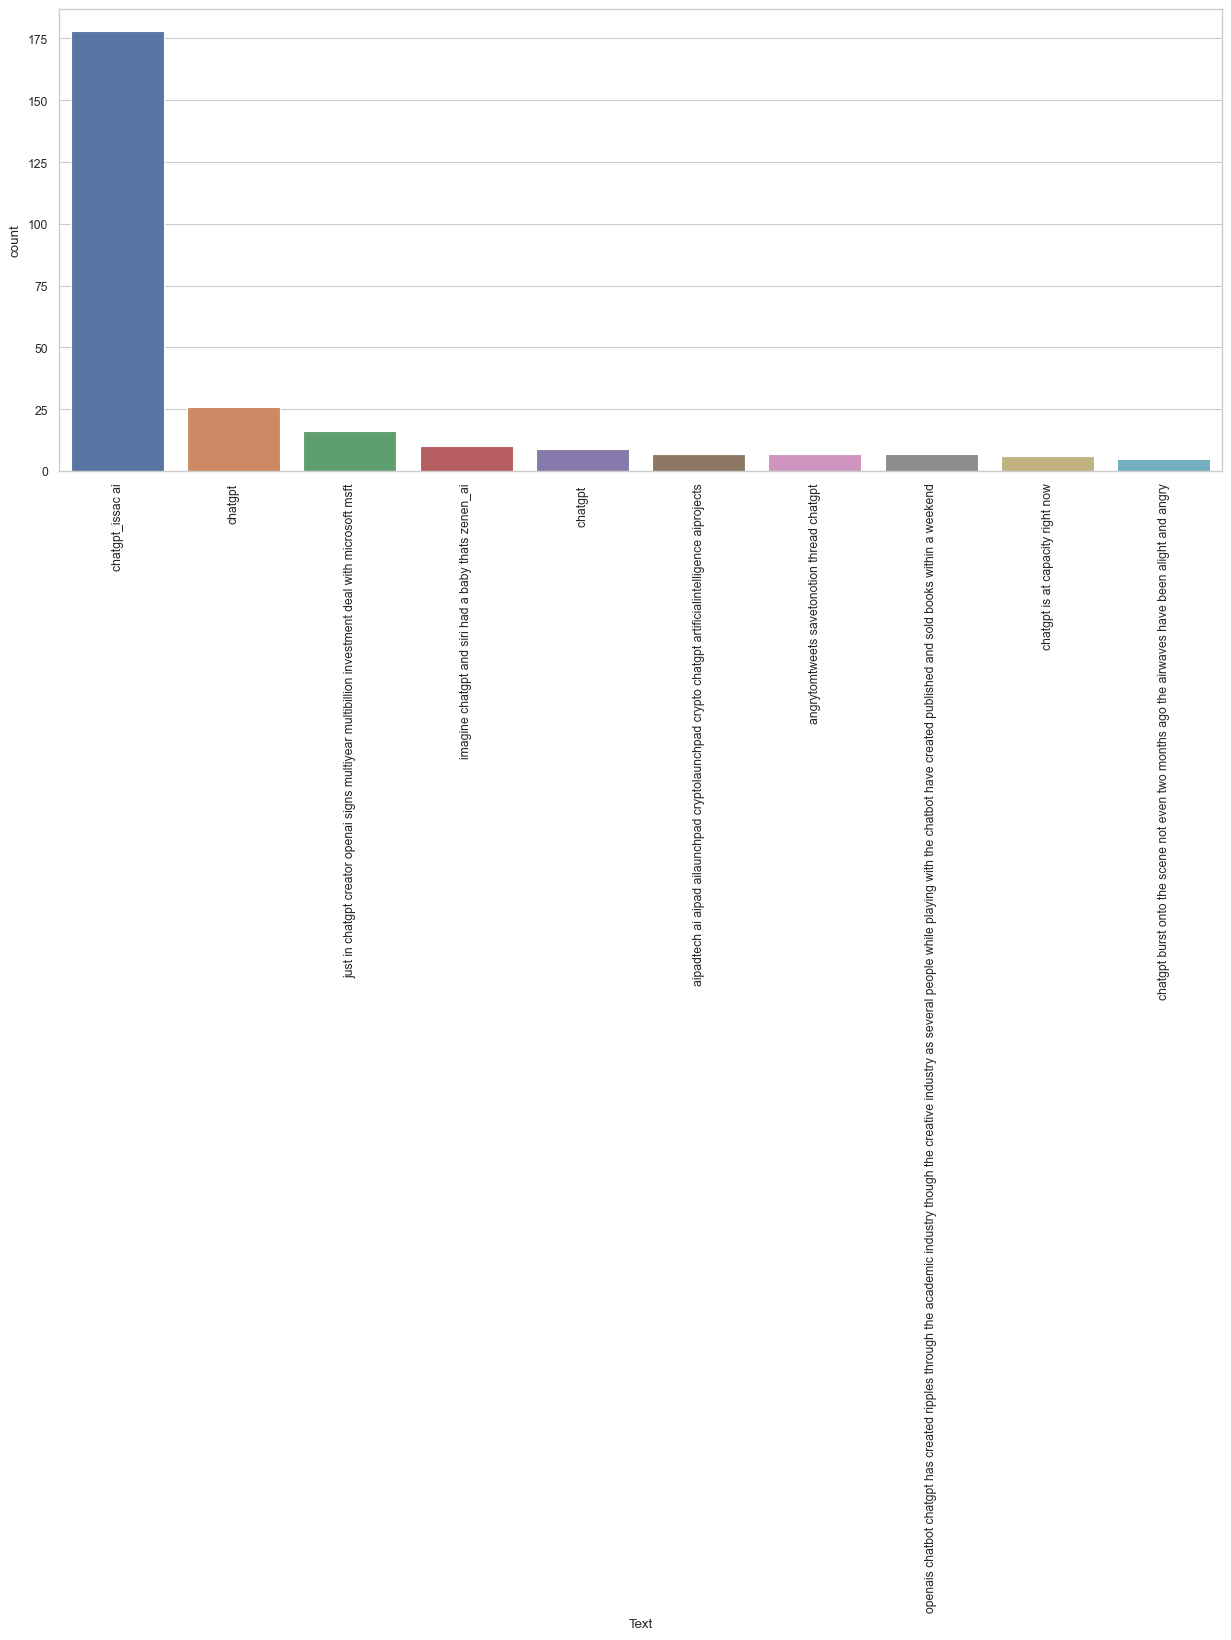

In [90]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Text', order=df["Text"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [92]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
#Vectorize the text data
vectorizer = CountVectorizer()  # You can also use TfidfVectorizer for TF-IDF representation
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [94]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
dt_predictions = dt_model.predict(X_test_vectorized)
dt_accuracy = metrics.accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)



Decision Tree Accuracy: 0.9147085291470853


In [95]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9248075192480751


In [96]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_vectorized, y_train)
knn_predictions = knn_model.predict(X_test_vectorized)
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.7991200879912009


In [97]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)

Multinomial Naive Bayes Accuracy: 0.8733126687331267


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.18906967533836835


/var/folders/rh/brhc68qd6tz5qmd49qw1g03w0000gn/T/ipykernel_3455/185025738.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(i / 3)


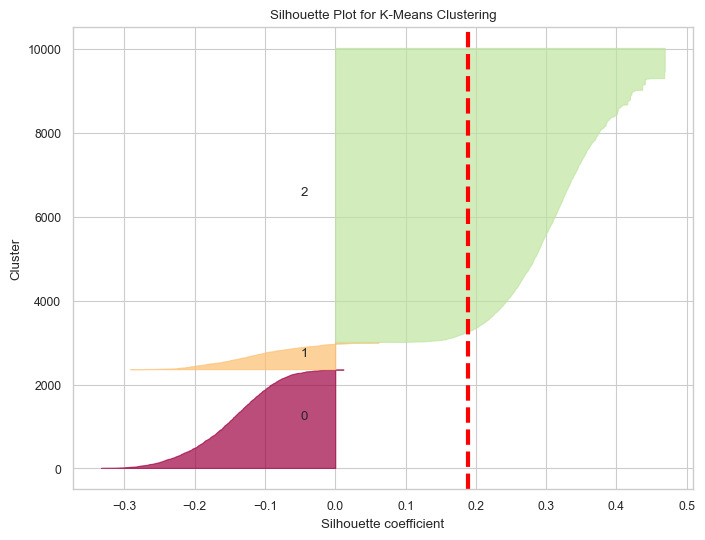

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=3)  # Choose an appropriate number of clusters
kmeans_model.fit(X_train_vectorized)
kmeans_predictions = kmeans_model.predict(X_test_vectorized)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_test_vectorized, kmeans_predictions)
print("Silhouette Score:", silhouette_avg)

# Visualize the silhouette plot
silhouette_values = silhouette_samples(X_test_vectorized, kmeans_predictions)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[kmeans_predictions == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(i / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.show()

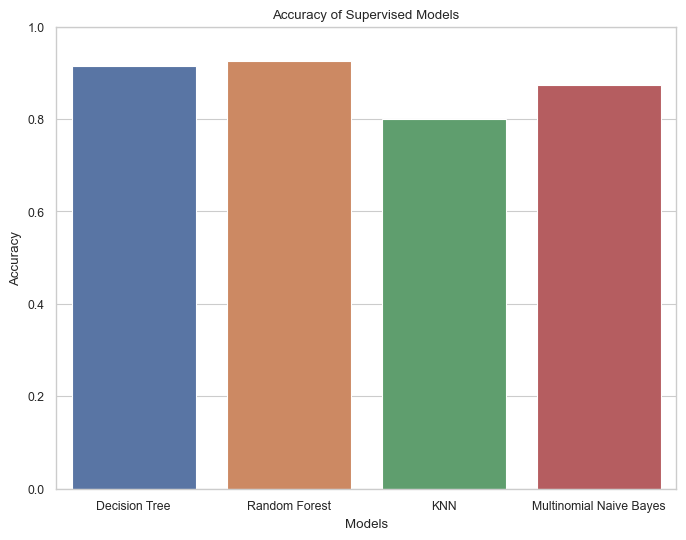

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the performance of supervised machine learning models
models = ['Decision Tree', 'Random Forest', 'KNN', 'Multinomial Naive Bayes']
accuracies = [dt_accuracy, rf_accuracy, knn_accuracy, nb_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy of Supervised Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

